
# TP : Prédire le prix de location de logements à Antananarivo avec une régression linéaire multiple

## 🎯 Objectifs pédagogiques

- Appliquer un pipeline de prétraitement complet sur un jeu de données semi-structuré.
- Gérer les variables qualitatives, les valeurs manquantes, la multicolinéarité et la scalabilité.
- Construire, tester et évaluer un modèle de régression linéaire multiple.
- Déployer le modèle dans une application Python Streamlit avec interface utilisateur.

## 🗂️ Jeu de données

Le jeu de données doit être collecté ou scrappé dans les pages comme Facebook. Il doit comporter les colonnes suivantes :

- `quartier` (catégorielle)
- `superficie` (numérique)
- `nombre_chambres` (numérique)
- `douche_wc`(interieur ou exterieur)
- `type_d_acces` (sans, moto, voiture, voiture_avec_par_parking)
- `meublé` (booléen:  oui ou non)
- `état_général` (catégorielle : bon, moyen, mauvais)
- `loyer_mensuel` (target)

## 🧪 Étapes du TP

### 📌 Partie 1 : Préparation des données
- Lecture du dataset brut
- Gestion des valeurs manquantes
- Encodage des variables catégorielles
- Création de variables dérivées
- Détection et suppression des variables fortement corrélées
- Standardisation et normalisation

### 📌 Partie 2 : Modélisation

- Séparation train/test
- Implémentation de la régression linéaire multiple
- Évaluation : R², RMSE
- Vérification des hypothèses d'élligibilité de la régression linéaire multiple (surtout sur les erreurs)

### 📌 Partie 3 : Optimisation du modèle

- Sélection de variables : backward elimination, RFE (à documenter)

### 📌 Partie 4 : Déploiement d’une application Streamlit

- Interface de saisie utilisateur
- Affichage du loyer prédit
- Visualisation des poids des variables
- Affichage sur la carte interactive

## 🧭 Carte interactive (option avancée)

Utiliser `streamlit-folium` pour permettre à l’utilisateur de cliquer sur une carte et de récupérer les coordonnées GPS. À partir de ces coordonnées, déterminer automatiquement le quartier en utilisant un fichier GeoJSON ou un système de polygones avec `geopandas`.

## 🔧 Technologies à utiliser

- `pandas`, `numpy`, `scikit-learn`, `matplotlib`, `seaborn`, `joblib`
- `streamlit`, `folium`, `streamlit-folium`
- Optionnel : `geopandas`, `shapely`

## 💡 Bonus

- Carte interactive avec folium
- Simuler des données additionnelles (pollution, sécurité)
- Tri automatique des caractéristiques influentes




## 🗂️ Jeu de données

Le jeu de données doit être collecté ou scrappé dans les pages comme Facebook. Il doit comporter les colonnes suivantes :

- `quartier` (catégorielle)
- `superficie` (numérique)
- `nombre_chambres` (numérique)
- `douche_wc`(interieur ou exterieur)
- `type_d_acces` (sans, moto, voiture, voiture_avec_par_parking)
- `meublé` (booléen:  oui ou non)
- `état_général` (catégorielle : bon, moyen, mauvais)
- `loyer_mensuel` (target)

In [21]:
##CREATION DES DONNEES
import csv
from typing import List, Dict, Any
import numpy as np

seed = 42
np.random.seed(seed)
data_headers = ["quartier", "superficie", "nombre_chambres", "douche_wc", "type_d_acces", "meuble", "etat_general", "loyer_mensuel"]
data = [
    {"quartier": "Antaninarenina", 
        "superficie": np.random.randint(50, 100, size=1)[0], 
        "nombre_chambres": np.random.randint(1, 5, size=1)[0], 
        "douche_wc": np.random.choice(["interieur", "exterieur"], size=1)[0], 
        "type_d_acces": "sans", 
        "meuble": "oui", 
        "etat_general": "bon", 
        "loyer_mensuel": np.random.randint(200000, 1000000, size=1)[0]
    },
    {"quartier": "Ampitatafika", 
        "superficie": np.random.randint(50, 100, size=1)[0], 
        "nombre_chambres": np.random.randint(1, 5, size=1)[0], 
        "douche_wc": np.random.choice(["interieur", "exterieur"], size=1)[0], 
        "type_d_acces": np.random.choice(["sans", "moto","voiture","voiture_avec_parking"], size=1)[0], 
        "meuble": np.random.choice(["oui", "non"], size=1)[0], 
        "etat_general": np.random.choice(["bon", "moyen", "mauvais"], size=1)[0], 
        "loyer_mensuel": np.random.randint(200000, 1000000, size=1)[0]
    },
    {"quartier": "Analakely", 
        "superficie": np.random.randint(50, 100, size=1)[0], 
        "nombre_chambres": np.random.randint(1, 5, size=1)[0], 
        "douche_wc": np.random.choice(["interieur", "exterieur"], size=1)[0], 
        "type_d_acces": np.random.choice(["sans", "moto","voiture","voiture_avec_parking"], size=1)[0], 
        "meuble": np.random.choice(["oui", "non"], size=1)[0], 
        "etat_general": np.random.choice(["bon", "moyen", "mauvais"], size=1)[0], 
        "loyer_mensuel": np.random.randint(200000, 1000000, size=1)[0]
    },
    {"quartier": "Ankazomanga", 
        "superficie": np.random.randint(50, 100, size=1)[0], 
        "nombre_chambres": np.random.randint(1, 5, size=1)[0], 
        "douche_wc": np.random.choice(["interieur", "exterieur"], size=1)[0], 
        "type_d_acces": np.random.choice(["sans", "moto","voiture","voiture_avec_parking"], size=1)[0], 
        "meuble": np.random.choice(["oui", "non"], size=1)[0], 
        "etat_general": np.random.choice(["bon", "moyen", "mauvais"], size=1)[0], 
        "loyer_mensuel": np.random.randint(200000, 1000000, size=1)[0]
    },
    {"quartier": "Ampitatafika", 
        "superficie": np.random.randint(50, 100, size=1)[0], 
        "nombre_chambres": np.random.randint(1, 5, size=1)[0], 
        "douche_wc": np.random.choice(["interieur", "exterieur"], size=1)[0], 
        "type_d_acces": np.random.choice(["sans", "moto","voiture","voiture_avec_parking"], size=1)[0], 
        "meuble": np.random.choice(["oui", "non"], size=1)[0], 
        "etat_general": np.random.choice(["bon", "moyen", "mauvais"], size=1)[0], 
        "loyer_mensuel": np.random.randint(200000, 1000000, size=1)[0]
    },
    {"quartier": "Analakely", 
        "superficie": np.random.randint(50, 100, size=1)[0], 
        "nombre_chambres": np.random.randint(1, 5, size=1)[0], 
        "douche_wc": np.random.choice(["interieur", "exterieur"], size=1)[0], 
        "type_d_acces": np.random.choice(["sans", "moto","voiture","voiture_avec_parking"], size=1)[0], 
        "meuble": np.random.choice(["oui", "non"], size=1)[0], 
        "etat_general": np.random.choice(["bon", "moyen", "mauvais"], size=1)[0], 
        "loyer_mensuel": np.random.randint(200000, 1000000, size=1)[0]
    },
    {"quartier": "Andoharanofotsy", 
        "superficie": np.random.randint(50, 100, size=1)[0], 
        "nombre_chambres": np.random.randint(1, 5, size=1)[0], 
        "douche_wc": np.random.choice(["interieur", "exterieur"], size=1)[0], 
        "type_d_acces": np.random.choice(["sans", "moto","voiture","voiture_avec_parking"], size=1)[0], 
        "meuble": np.random.choice(["oui", "non"], size=1)[0], 
        "etat_general": np.random.choice(["bon", "moyen", "mauvais"], size=1)[0], 
        "loyer_mensuel": np.random.randint(200000, 1000000, size=1)[0]
    },
]


def ecrire_dans_csv(fichier: str, donnees: List[Dict[str, Any]], en_tetes: List[str] = None, mode: str = 'w') -> None:
    """
    Écrit des données dans un fichier CSV.
    
    Args:
        fichier (str): Chemin vers le fichier CSV
        donnees (List[Dict]): Liste de dictionnaires contenant les données à écrire
        en_tetes (List[str], optional): Liste des noms de colonnes. Si non fourni, utilise les clés du premier dictionnaire.
        mode (str, optional): Mode d'ouverture du fichier. 'w' pour écraser, 'a' pour ajouter. Par défaut 'w'.
    """
    if not donnees:
        print("Aucune donnée à écrire.")
        return

    # Utiliser les en-têtes fournis ou les clés du premier dictionnaire
    if en_tetes is None:
        en_tetes = list(donnees[0].keys())
    
    try:
        with open(fichier, mode, newline='', encoding='utf-8') as f:
            writer = csv.DictWriter(f, fieldnames=en_tetes)
            
            # Ne pas écrire l'en-tête si on est en mode ajout et que le fichier existe déjà
            if mode == 'w' or (mode == 'a' and f.tell() == 0):
                writer.writeheader()
                
            writer.writerows(donnees)
            
        print(f"Données écrites avec succès dans {fichier}")
        
    except Exception as e:
        print(f"Erreur lors de l'écriture du fichier {fichier}: {str(e)}")

ecrire_dans_csv('7_data_regression.csv', data)

Données écrites avec succès dans 7_data_regression.csv


### 📌 Partie 1 : Préparation des données
- Lecture du dataset brut
- Gestion des valeurs manquantes
- Encodage des variables catégorielles
- Création de variables dérivées
- Détection et suppression des variables fortement corrélées
- Standardisation et normalisation

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

df = pd.read_csv("7_data_regression.csv",encoding="utf-8")

#gestion des valeurs manquantes
# Afficher les colonnes avec des valeurs manquantes
print(df.isnull().sum())

# Exemple : remplir les valeurs manquantes
df['superficie'] = df['superficie'].fillna(df['superficie'].median())
df['nombre_chambres'] = df['nombre_chambres'].fillna(df['nombre_chambres'].median())
df['douche_wc'] = df['douche_wc'].fillna(df['douche_wc'].mode()[0])
df['type_d_acces'] = df['type_d_acces'].fillna(df['type_d_acces'].mode()[0])
df['meuble'] = df['meuble'].fillna('non')
df['etat_general'] = df['etat_general'].fillna(df['etat_general'].mode()[0])
df['loyer_mensuel'] = df['loyer_mensuel'].fillna(df['loyer_mensuel'].median())

print(df.isnull().sum())

quartiers = sorted(df["quartier"].unique())
print(quartiers)


quartier           0
superficie         0
nombre_chambres    0
douche_wc          0
type_d_acces       0
meuble             0
etat_general       0
loyer_mensuel      0
dtype: int64
quartier           0
superficie         0
nombre_chambres    0
douche_wc          0
type_d_acces       0
meuble             0
etat_general       0
loyer_mensuel      0
dtype: int64
['Ampitatafika', 'Analakely', 'Andoharanofotsy', 'Ankazomanga', 'Antaninarenina']


Encodage des variables catégorielles

In [23]:
# Définir les colonnes
num_features = ['superficie', 'nombre_chambres']
cat_features = ['quartier', 'douche_wc', 'type_d_acces', 'meuble', 'etat_general']

# Création du préprocesseur
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
])

Suppression de variables fortement corrélées (multicolinéarité)

In [24]:
# Créer une version numérique uniquement (après encodage si besoin)
df_encoded = pd.get_dummies(df.drop('loyer_mensuel', axis=1), drop_first=True)
corr_matrix = df_encoded.corr().abs()

# Détection des corrélations fortes
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_encoded.drop(columns=to_drop, inplace=True)

Construction du jeu de données final pour la modélisation

In [25]:
X = df.drop('loyer_mensuel', axis=1)
y = df['loyer_mensuel']


# Partie 2
Séparation en train/test

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop('loyer_mensuel', axis=1)
y = df['loyer_mensuel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Construction du pipeline de prétraitement + régression

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# Colonnes numériques et catégorielles
num_features = ['superficie', 'nombre_chambres']
cat_features = ['quartier', 'douche_wc', 'type_d_acces', 'meuble', 'etat_general']

# Pipeline numérique
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline catégoriel
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine tout
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Pipeline complet avec modèle
model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])


Entraînement du modèle

In [28]:
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['superficie',
                                                   'nombre_chambres']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['quartier', 'douche_wc',
                                                   'type_d_acces', 'meuble',
                                                   'etat_general'])])),
                ('regressor', LinearRegression())])

Prédictions et évaluation

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model_pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"R² : {r2:.2f}")
print(f"RMSE : {rmse:.2f}")


R² : -50.63
RMSE : 312465494892.75


C:\Users\randy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Vérification des hypothèses (résidus)

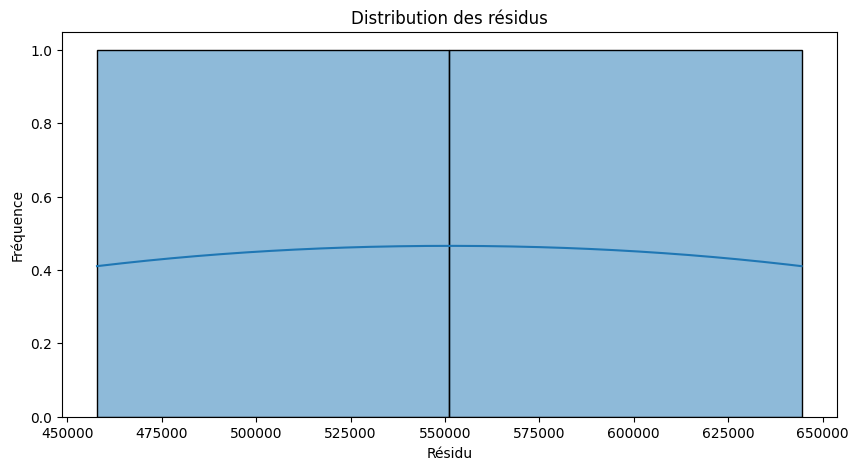

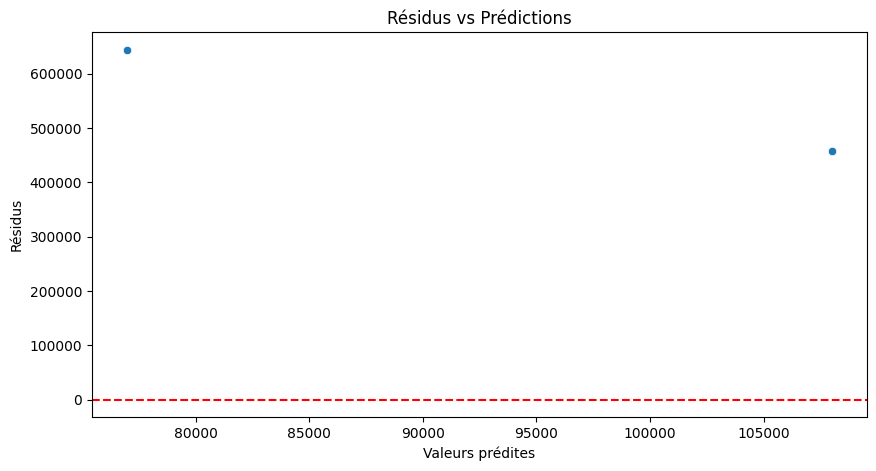

In [30]:
# Affichage des résidus
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title("Distribution des résidus")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.show()

# Résidus vs Prédictions
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Résidus vs Prédictions")
plt.show()

Export du modèle (pour Streamlit ensuite)

In [31]:
import joblib

joblib.dump(model_pipeline, 'model_loyer.joblib')


['model_loyer.joblib']

Partie 3 : Optimisation du modèle

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Pipeline de transformation seul
preprocessor_only = model_pipeline.named_steps['preprocessing']

# Transformer X avec le preprocessor
X_transformed = preprocessor_only.fit_transform(X)

# Appliquer RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=10)  # choisis combien de variables tu veux garder

rfe.fit(X_transformed, y)

# Afficher les variables sélectionnées
print("Variables sélectionnées :", rfe.support_)
print("Rang des variables :", rfe.ranking_)

# Obtenir noms des colonnes après transformation
feature_names = preprocessor_only.get_feature_names_out()

# Afficher les noms sélectionnés
selected_features = [feature for feature, selected in zip(feature_names, rfe.support_) if selected]
print("Variables sélectionnées :", selected_features)


Variables sélectionnées : [ True  True  True  True  True  True  True False  True  True False  True]
Rang des variables : [1 1 1 1 1 1 1 3 1 1 2 1]
Variables sélectionnées : ['num__superficie', 'num__nombre_chambres', 'cat__quartier_Analakely', 'cat__quartier_Andoharanofotsy', 'cat__quartier_Ankazomanga', 'cat__quartier_Antaninarenina', 'cat__douche_wc_interieur', 'cat__type_d_acces_voiture', 'cat__meuble_oui', 'cat__etat_general_moyen']


In [33]:
# !pip install streamlit-folium folium geopandas shapely

In [34]:
ohe = model_pipeline.named_steps['preprocessing'].named_transformers_['cat'].named_steps['encoder']
print(ohe.categories_)


[array(['Ampitatafika', 'Analakely', 'Andoharanofotsy', 'Ankazomanga',
       'Antaninarenina'], dtype=object), array(['exterieur', 'interieur'], dtype=object), array(['moto', 'sans', 'voiture'], dtype=object), array(['non', 'oui'], dtype=object), array(['bon', 'mauvais', 'moyen'], dtype=object)]
